In [42]:
# I use Colab to code, so I also use Google Drive to load img!

from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/MyDrive/Image Processing')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. Blurring by convolutions

## (a) Implement your own convolutional mean filter with the following sizes: 3 * 3, 5 * 5, 9 * 9 pixels (example kernels provided in the lecture).

In [43]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

def convolutional_filter(image, kernel):
    m, n = kernel.shape
    if (m == n):
        lenth, width = image.shape
        lenth = lenth - m + 1
        width = width - m + 1
        filtered_image = np.zeros((lenth,width))
        for i in range(lenth):
            for j in range(width):
                # use dot product and sum all the element in a kernel
                filtered_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
        return filtered_image

In [44]:
# Here I try different padding method, like zero-padding and edge-padding
def pad_image(image, kernel, padding_type):

    pad_width = kernel.shape[0] // 2
    # padding 0 to each image based on the size of kernel
    if padding_type == "zero":
        return np.pad(image, pad_width=pad_width, mode='constant', constant_values=0)
    # Pad the original image with the values of the boundaries
    elif padding_type == "edge":
        return np.pad(image, pad_width=pad_width, mode='edge')
    else:
        raise ValueError("Invalid padding_type. Choose either 'zero' or 'edge'.")

In [45]:
# Define different sizes of kernels
kernel_3x3 = np.ones((3,3))/9
kernel_5x5 = np.ones((5,5))/25
kernel_9x9 = np.ones((9,9))/81

## (b) Apply each filter on the greyscale images provided on ILIAS.

In [46]:
# Load gray image Peppers.png
image = Image.open('Peppers.png')
image_array = np.array(image)

# Apply convolutional mean filter by padding zero
padding_type = "zero"
result_k3_zero = convolutional_filter(pad_image(image_array, kernel_3x3, padding_type), kernel_3x3)
result_k5_zero = convolutional_filter(pad_image(image_array, kernel_5x5, padding_type), kernel_5x5)
result_k9_zero = convolutional_filter(pad_image(image_array, kernel_9x9, padding_type), kernel_9x9)

# Apply convolutional mean filter by padding edge
padding_type = "edge"
result_k3_edge = convolutional_filter(pad_image(image_array, kernel_3x3, padding_type), kernel_3x3)
result_k5_edge = convolutional_filter(pad_image(image_array, kernel_5x5, padding_type), kernel_5x5)
result_k9_edge = convolutional_filter(pad_image(image_array, kernel_9x9, padding_type), kernel_9x9)

# Without padding
result_k3 = convolutional_filter(image_array, kernel_3x3)
result_k5 = convolutional_filter(image_array, kernel_5x5)
result_k9 = convolutional_filter(image_array, kernel_9x9)

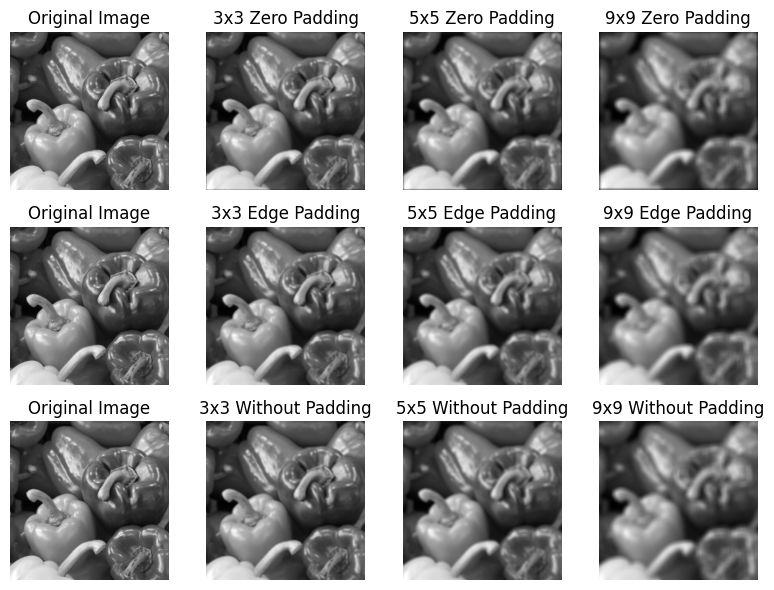

In [47]:
# Display
fig, axs = plt.subplots(3, 4, figsize=(8,6))

# Original Image
axs[0, 0].imshow(image_array, cmap='gray'), axs[0, 0].set_title('Original Image'), axs[0, 0].axis('off')
# 3x3 Zero Padding
axs[0, 1].imshow(result_k3_zero, cmap='gray'), axs[0, 1].set_title('3x3 Zero Padding'), axs[0, 1].axis('off')
# 5x5 Zero Padding
axs[0, 2].imshow(result_k5_zero, cmap='gray'), axs[0, 2].set_title('5x5 Zero Padding'), axs[0, 2].axis('off')
# 9x9 Zero Padding
axs[0, 3].imshow(result_k9_zero, cmap='gray'), axs[0, 3].set_title('9x9 Zero Padding'), axs[0, 3].axis('off')
# Original Image
axs[1, 0].imshow(image_array, cmap='gray'), axs[1, 0].set_title('Original Image'), axs[1, 0].axis('off')
# 3x3 Edge Padding
axs[1, 1].imshow(result_k3_edge, cmap='gray'), axs[1, 1].set_title('3x3 Edge Padding'), axs[1, 1].axis('off')
# 5x5 Edge Padding
axs[1, 2].imshow(result_k5_edge, cmap='gray'), axs[1, 2].set_title('5x5 Edge Padding'), axs[1, 2].axis('off')
# 9x9 Edge Padding
axs[1, 3].imshow(result_k9_edge, cmap='gray'), axs[1, 3].set_title('9x9 Edge Padding'), axs[1, 3].axis('off')
# Original Image
axs[2, 0].imshow(image_array, cmap='gray'), axs[2, 0].set_title('Original Image'), axs[2, 0].axis('off')
# 3x3 Edge Padding
axs[2, 1].imshow(result_k3, cmap='gray'), axs[2, 1].set_title('3x3 Without Padding'), axs[2, 1].axis('off')
# 5x5 Edge Padding
axs[2, 2].imshow(result_k5, cmap='gray'), axs[2, 2].set_title('5x5 Without Padding'), axs[2, 2].axis('off')
# 9x9 Edge Padding
axs[2, 3].imshow(result_k9, cmap='gray'), axs[2, 3].set_title('9x9 Without Padding'), axs[2, 3].axis('off')

plt.tight_layout()
plt.show()

# you can see use edge-padding will be better since there are no black border of those image

In [48]:
cv2.imwrite('mean_filter_3x3.png', result_k3_edge)
cv2.imwrite('mean_filter_5x5.png', result_k5_edge)
cv2.imwrite('mean_filter_9x9.png', result_k9_edge)

True

## (c) Comment on the results obtained with the different filter sizes.

As the size of the convolution kernel increases, the processed image becomes blurrier and blurrier, and you can't see the texture or the exact shape of the peppers in the picture, meaning that detailed information is lost. Of course, the image becomes smoother and smoother, with less contrasty areas.\
In addition, if the image is not padding according to the size of the convolution kernel in advance, the larger the size of the convolution kernel, the more boundary information is lost.

# 2. Edge detection

## (a) Implement your own Laplacian of Gaussian filter (example provided in the lecture).

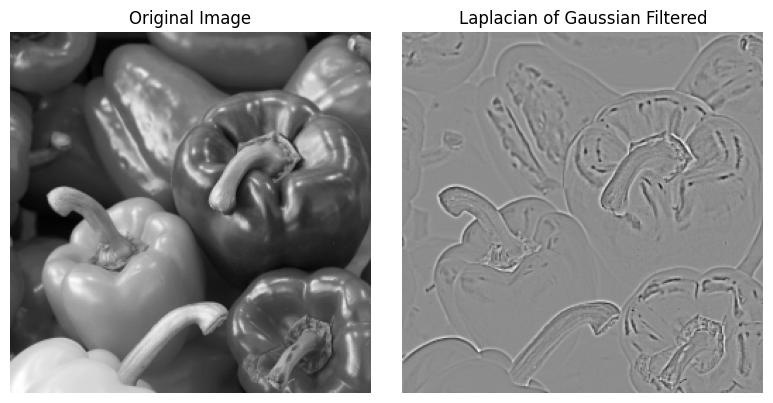

In [49]:
Laplacian_of_Gaussian_kernel = np.array([
    [0, 1, 1, 1, 0],
    [1, 3, 0, 3, 1],
    [1, 0, -24, 0, 1],
    [1, 3, 0, 3, 1],
    [0, 1, 1, 1, 0]
])

image = Image.open('Peppers.png')
image_array = np.array(image)
padding_type = "edge"
result_LG = convolutional_filter(pad_image(image_array, Laplacian_of_Gaussian_kernel, padding_type), Laplacian_of_Gaussian_kernel)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1), plt.imshow(image_array, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 2, 2), plt.imshow(result_LG, cmap='gray'), plt.title('Laplacian of Gaussian Filtered'), plt.axis('off')
plt.tight_layout()
plt.show()

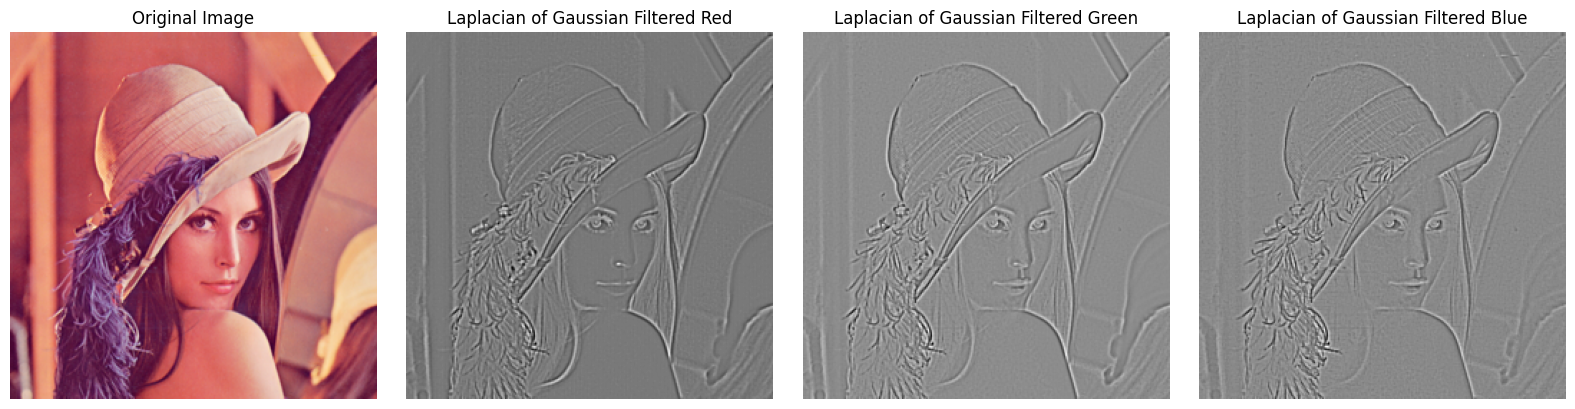

In [50]:
# Also for RGB image

image = Image.open('Lena.png')
image_array = np.array(image)
image_array_Red = image_array[:, :, 0]
image_array_Green = image_array[:, :, 1]
image_array_Blue = image_array[:, :, 2]

padding_type = "edge"
result_LG_Red = convolutional_filter(pad_image(image_array_Red, Laplacian_of_Gaussian_kernel, padding_type), Laplacian_of_Gaussian_kernel)
result_LG_Green = convolutional_filter(pad_image(image_array_Green, Laplacian_of_Gaussian_kernel, padding_type), Laplacian_of_Gaussian_kernel)
result_LG_Blue = convolutional_filter(pad_image(image_array_Blue, Laplacian_of_Gaussian_kernel, padding_type), Laplacian_of_Gaussian_kernel)

plt.figure(figsize=(16, 4))
plt.subplot(1, 4, 1), plt.imshow(image_array, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 4, 2), plt.imshow(result_LG_Red, cmap='gray'), plt.title('Laplacian of Gaussian Filtered Red'), plt.axis('off')
plt.subplot(1, 4, 3), plt.imshow(result_LG_Green, cmap='gray'), plt.title('Laplacian of Gaussian Filtered Green'), plt.axis('off')
plt.subplot(1, 4, 4), plt.imshow(result_LG_Blue, cmap='gray'), plt.title('Laplacian of Gaussian Filtered Blue'), plt.axis('off')
plt.tight_layout()
plt.show()

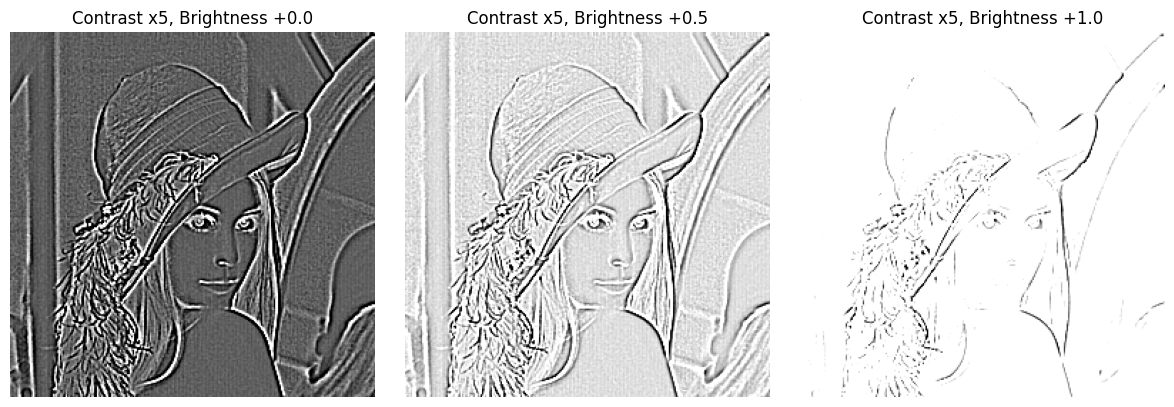

In [51]:
# Visualization with enhanced contrast (factor 5) and increased brightness of resp. 0.0, 0.5, 1.0
def adjust_image(img, contrast_factor, brightness_change):
    return np.clip((img - 0.5) * contrast_factor + 0.5 + brightness_change, 0, 1)

def normalize(image):
    # normalize each pixel value between 0 and 1
    normalized_img = (image - np.min(image)) / (np.max(image) - np.min(image))
    return normalized_img

# Adjust contrast and brightness
result_LG = result_LG_Red
img_contrast5_brightness0 = adjust_image(normalize(result_LG), 5, 0.0)
img_contrast5_brightness0_5 = adjust_image(normalize(result_LG), 5, 0.5)
img_contrast5_brightness1 = adjust_image(normalize(result_LG), 5, 1.0)

plt.figure(figsize=(12,4))
plt.subplot(1, 3, 1), plt.imshow(img_contrast5_brightness0, cmap='gray'), plt.title('Contrast x5, Brightness +0.0'), plt.axis('off')
plt.subplot(1, 3, 2), plt.imshow(img_contrast5_brightness0_5, cmap='gray'), plt.title('Contrast x5, Brightness +0.5'), plt.axis('off')
plt.subplot(1, 3, 3), plt.imshow(img_contrast5_brightness1, cmap='gray'), plt.title('Contrast x5, Brightness +1.0'), plt.axis('off')
plt.tight_layout()
plt.show()

## (b) Implement your own gradient filters for edge detection (examples for vertical and horizontal filters provided in the lecture).

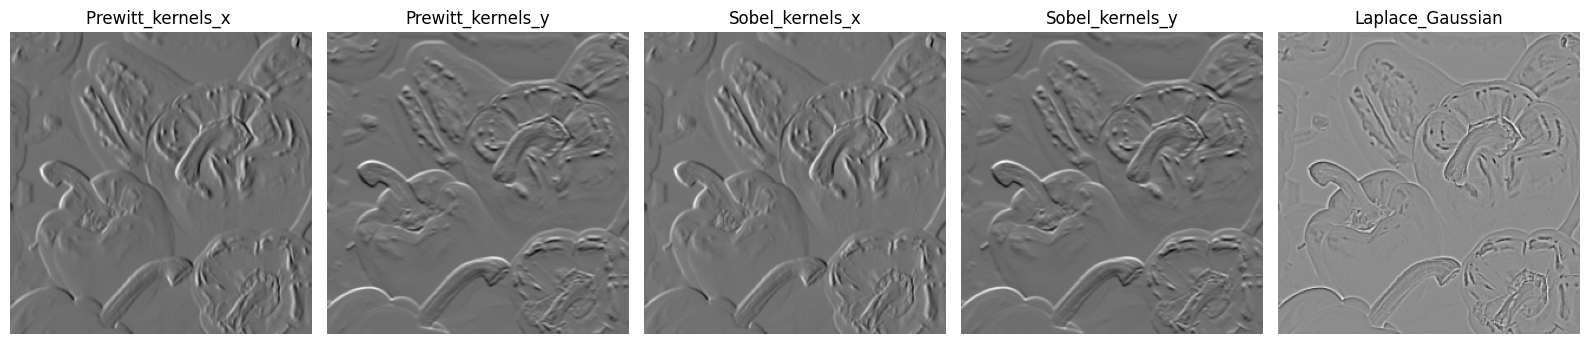

In [52]:
Prewitt_kernels_x = np.array([
    [-1, 0, 1],
    [-1, 0, 1],
    [-1, 0, 1],
])/3.0

Prewitt_kernels_y = np.array([
    [-1, -1, -1],
    [0, 0, 0],
    [1, 1, 1],
])/3.0

Sobel_kernels_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1],
])/4.0

Sobel_kernels_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1],
])/4.0

image = Image.open('Peppers.png')
image_array = np.array(image)
padding_type = "edge"
result_Prewitt_kernels_x = convolutional_filter(pad_image(image_array, Prewitt_kernels_x, padding_type), Prewitt_kernels_x)
result_Prewitt_kernels_y = convolutional_filter(pad_image(image_array, Prewitt_kernels_y, padding_type), Prewitt_kernels_y)
result_Sobel_kernels_x = convolutional_filter(pad_image(image_array, Sobel_kernels_x, padding_type), Sobel_kernels_x)
result_Sobel_kernels_y = convolutional_filter(pad_image(image_array, Sobel_kernels_y, padding_type), Sobel_kernels_y)
result_LG = convolutional_filter(pad_image(image_array, Laplacian_of_Gaussian_kernel, padding_type), Laplacian_of_Gaussian_kernel)

plt.figure(figsize=(16, 4))
plt.subplot(1, 5, 1), plt.imshow(result_Prewitt_kernels_x, cmap='gray'), plt.title('Prewitt_kernels_x '), plt.axis('off')
plt.subplot(1, 5, 2), plt.imshow(result_Prewitt_kernels_y, cmap='gray'), plt.title('Prewitt_kernels_y'), plt.axis('off')
plt.subplot(1, 5, 3), plt.imshow(result_Sobel_kernels_x, cmap='gray'), plt.title('Sobel_kernels_x'), plt.axis('off')
plt.subplot(1, 5, 4), plt.imshow(result_Sobel_kernels_y, cmap='gray'), plt.title('Sobel_kernels_y'), plt.axis('off')
plt.subplot(1, 5, 5), plt.imshow(result_LG, cmap='gray'), plt.title('Laplace_Gaussian'), plt.axis('off')

plt.tight_layout()
plt.show()

In [53]:
cv2.imwrite('Laplacian_of_Gaussian_filter.png', result_LG)
cv2.imwrite('Gradient_filter.png', result_Prewitt_kernels_x)

True

## (c) Apply both edge detection methods to the greyscale images provided on ILIAS.

Please view the display images above.

## (d) Comment on the results obtained with the two methods.

You can see that the image processed with Laplace_Gaussian kernel, is smoother and has a lot less bumpy and noisy parts of the image (because the Gaussian mechanism removes noise from the image very well);\
\
Images processed with Prewitt_kernels and Sobel_kernels have a very pronounced gradient and the differences in the gradient images produced by kernels acting in different directions are obvious. However, there is a lot of noise in the images and they do not capture both horizontal and vertical gradient changes as well as the Laplace_Gaussian kernel.

# 3. Statistical filters

## (a) Implement your own minimum and maximum filters (formulas provided in the lecture), with size 3 * 3 and 5 * 5 pixels.

In [54]:
# I consolidate everything into one function for ease of use.
def min_max_filter(image, type, kernel_size):

    output = np.zeros_like(image)

    if type == "minimum":
      for i in range(image.shape[0]):
          for j in range(image.shape[1]):
              region = image[i:i+kernel_size, j:j+kernel_size]
              output[i, j] = np.min(region)

    if type == "maximum":
      for i in range(image.shape[0]):
          for j in range(image.shape[1]):
              region = image[i:i+kernel_size, j:j+kernel_size]
              output[i, j] = np.max(region)

    if type == "combination":
      for i in range(image.shape[0]):
          for j in range(image.shape[1]):
              region = image[i:i+kernel_size, j:j+kernel_size]
              output[i, j] = np.max(region) - np.min(region)
              # print(np.max(region), " - ", np.min(region))

    return output

## (b) Apply both filters to the greyscale images provided on ILIAS, as well as their combination (max - min).

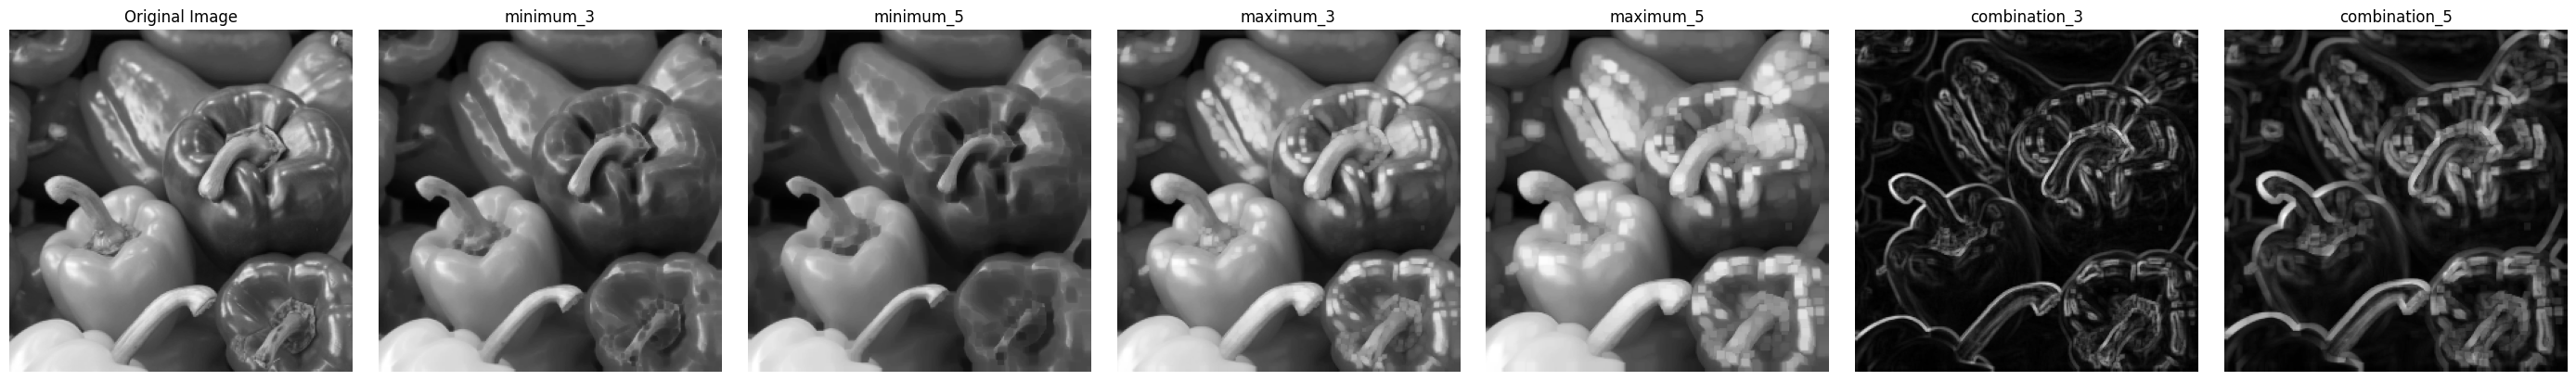

In [55]:
image = Image.open('Peppers.png')
image_array = np.array(image)
padding_type = "edge"

kernel_size = 3
kernels = np.zeros((kernel_size, kernel_size))
type_of_kernel = "minimum"
result_minimum_3 = min_max_filter(pad_image(image_array, kernels, padding_type), type_of_kernel, kernel_size)

kernel_size = 5
kernels = np.zeros((kernel_size, kernel_size))
type_of_kernel = "minimum"
result_minimum_5 = min_max_filter(pad_image(image_array, kernels, padding_type), type_of_kernel, kernel_size)

kernel_size = 3
kernels = np.zeros((kernel_size, kernel_size))
type_of_kernel = "maximum"
result_maximum_3 = min_max_filter(pad_image(image_array, kernels, padding_type), type_of_kernel, kernel_size)

kernel_size = 5
kernels = np.zeros((kernel_size, kernel_size))
type_of_kernel = "maximum"
result_maximum_5 = min_max_filter(pad_image(image_array, kernels, padding_type), type_of_kernel, kernel_size)

kernel_size = 3
kernels = np.zeros((kernel_size, kernel_size))
type_of_kernel = "combination"
result_combination_3 = min_max_filter(pad_image(image_array, kernels, padding_type), type_of_kernel, kernel_size)

kernel_size = 5
kernels = np.zeros((kernel_size, kernel_size))
type_of_kernel = "combination"
result_combination_5 = min_max_filter(pad_image(image_array, kernels, padding_type), type_of_kernel, kernel_size)

plt.figure(figsize=(28, 4))
plt.subplot(1, 7, 1), plt.imshow(image, cmap='gray'), plt.title('Original Image'), plt.axis('off')
plt.subplot(1, 7, 2), plt.imshow(result_minimum_3, cmap='gray'), plt.title('minimum_3'), plt.axis('off')
plt.subplot(1, 7, 3), plt.imshow(result_minimum_5, cmap='gray'), plt.title('minimum_5'), plt.axis('off')
plt.subplot(1, 7, 4), plt.imshow(result_maximum_3, cmap='gray'), plt.title('maximum_3'), plt.axis('off')
plt.subplot(1, 7, 5), plt.imshow(result_maximum_5, cmap='gray'), plt.title('maximum_5'), plt.axis('off')
plt.subplot(1, 7, 6), plt.imshow(result_combination_3, cmap='gray'), plt.title('combination_3'), plt.axis('off')
plt.subplot(1, 7, 7), plt.imshow(result_combination_5, cmap='gray'), plt.title('combination_5'), plt.axis('off')

plt.tight_layout()
plt.show()

In [56]:
cv2.imwrite('Minimum_5.png', result_minimum_5)
cv2.imwrite('Maximum_5.png', result_maximum_5)
cv2.imwrite('Combination_5.png', result_combination_5)

True

## (c) Comment on the results obtained with the individual filters and their combination.


When using the minimum kernel, most of the areas of the image that have highlights disappear, and as the kernel size gets larger, the image becomes dimmer and blurrier;\
When using the maximum kernel, the highlights in the image become larger, and as the kernel size gets larger, the image becomes kinder and blurrier, like I'm blind and want to rub my eyes.\
When using the combination kernel, only the border texture of the image has white lines now, and as the kernel size gets bigger, the white lines start to get blurry.